In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\dinks\anaconda3\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

Three categories are present within the koi_disposition column: CANDICATE, CONFIRMED, and FALSE POSITIVE. Candidate pertains to objects of interest that have potential for being an exoplanet, but they have not yet been confirmed or rejected. Therefore, there is an intrinsic level of uncertainty associated with each candidates, which would impact the accuracy of the prediction model. For this reason, candidates are being removed from the training dataset.

In [5]:
# create a dataframe with only confirmed and false positive objects
cond = (df['koi_disposition']=='CONFIRMED')| (df['koi_disposition']=='FALSE POSITIVE')
df = df.loc[cond, :]
df['koi_disposition'].value_counts()

FALSE POSITIVE    3504
CONFIRMED         1800
Name: koi_disposition, dtype: int64

In [6]:
# Set features. This will also be used as your x values.
selected_features = df[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
                        'koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration',
                        'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol', 'koi_model_snr',
                        'koi_steff', 'koi_slogg', 'koi_srad']]

# Create a Train Test Split

Use `koi_disposition` for the y values

In [7]:
X = selected_features
y = df['koi_disposition']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad
979,0,1,1,1,41.077297,379.128480,0.030,5.52500,1216.8,3.25,523,17.74,28.8,5665,4.381,0.938
6201,0,1,0,0,13.639480,144.531439,1.033,3.12422,81103.0,44.00,680,50.51,664.1,5461,4.517,0.846
5648,0,1,0,0,14.854416,136.559783,0.570,5.13753,77410.0,29.77,798,95.83,2822.1,6214,4.444,1.022
229,0,0,0,0,10.681695,131.550820,0.646,3.60500,307.8,2.30,897,152.75,21.9,5553,4.221,1.250
1302,0,0,0,0,12.509458,136.992170,0.626,3.47900,155.3,1.54,875,138.54,16.0,5949,4.303,1.184


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model



k: 1, Train/Test Score: 1.000/0.983
k: 3, Train/Test Score: 0.993/0.986
k: 5, Train/Test Score: 0.992/0.986
k: 7, Train/Test Score: 0.992/0.986
k: 9, Train/Test Score: 0.992/0.986
k: 11, Train/Test Score: 0.992/0.986
k: 13, Train/Test Score: 0.992/0.986
k: 15, Train/Test Score: 0.992/0.986
k: 17, Train/Test Score: 0.992/0.986
k: 19, Train/Test Score: 0.992/0.986


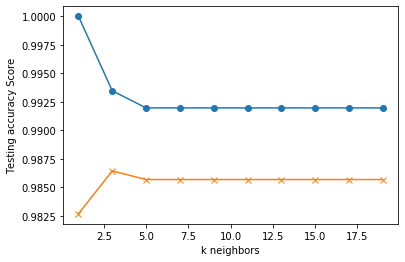

In [10]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Loop through different k values to see which has the highest accuracy
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [11]:
# Create the GridSearchCV model
# Create the GridSearchCV model
new_knn = KNeighborsClassifier(n_neighbors=9)
from sklearn.model_selection import GridSearchCV
param_grid = {'p': [1,2],
             'n_neighbors':[3] }
grid = GridSearchCV(new_knn, param_grid, verbose=3)

In [12]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] n_neighbors=3, p=1 ..............................................
[CV] .................. n_neighbors=3, p=1, score=0.985, total=   0.1s
[CV] n_neighbors=3, p=1 ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................. n_neighbors=3, p=1, score=0.986, total=   0.1s
[CV] n_neighbors=3, p=1 ..............................................
[CV] .................. n_neighbors=3, p=1, score=0.992, total=   0.1s
[CV] n_neighbors=3, p=1 ..............................................
[CV] .................. n_neighbors=3, p=1, score=0.995, total=   0.1s
[CV] n_neighbors=3, p=1 ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] .................. n_neighbors=3, p=1, score=0.992, total=   0.1s
[CV] n_neighbors=3, p=2 ..............................................
[CV] .................. n_neighbors=3, p=2, score=0.985, total=   0.1s
[CV] n_neighbors=3, p=2 ..............................................
[CV] .................. n_neighbors=3, p=2, score=0.985, total=   0.1s
[CV] n_neighbors=3, p=2 ..............................................
[CV] .................. n_neighbors=3, p=2, score=0.991, total=   0.1s
[CV] n_neighbors=3, p=2 ..............................................
[CV] .................. n_neighbors=3, p=2, score=0.996, total=   0.1s
[CV] n_neighbors=3, p=2 ..............................................
[CV] .................. n_neighbors=3, p=2, score=0.992, total=   0.1s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=9, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [3], 'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [13]:
print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 3, 'p': 1}
0.9901978445687558


In [14]:
 # Make predictions with the hypertuned model
predictions = grid.predict(X_test_scaled)

In [15]:
 # Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                precision    recall  f1-score   support

     CONFIRMED       1.00      0.96      0.98       451
FALSE POSITIVE       0.98      1.00      0.99       875

      accuracy                           0.99      1326
     macro avg       0.99      0.98      0.98      1326
  weighted avg       0.99      0.99      0.99      1326



In [16]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
train_score = knn.score(X_train_scaled, y_train)
test_score = knn.score(X_test_scaled, y_test)
# Make predictions with the untuned model
untuned_prediction = knn.predict(X_test_scaled)

In [17]:
 # Calculate classification report of untuned model
from sklearn.metrics import classification_report
print(classification_report(y_test, untuned_prediction))

                precision    recall  f1-score   support

     CONFIRMED       1.00      0.96      0.98       451
FALSE POSITIVE       0.98      1.00      0.99       875

      accuracy                           0.99      1326
     macro avg       0.99      0.98      0.98      1326
  weighted avg       0.99      0.99      0.99      1326



# Save the Model

In [18]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'jonathan_antia_knn.sav'
joblib.dump(knn, filename)

['jonathan_antia_knn.sav']